Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to 
understand the distribution and relationships between the variables.

In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [429]:
df=pd.read_csv("diabetes.csv")

In [430]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [431]:
df.shape

(768, 9)

In [432]:
df.isnull().sum() #3 no null variables

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [433]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [434]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [435]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

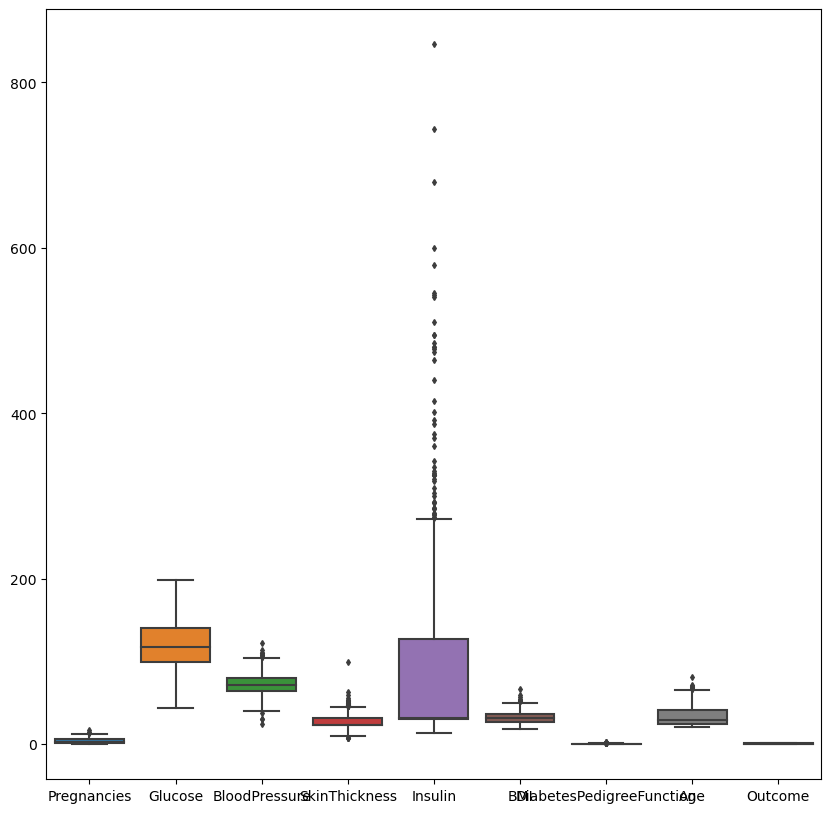

In [436]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,fliersize=3)

In [437]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

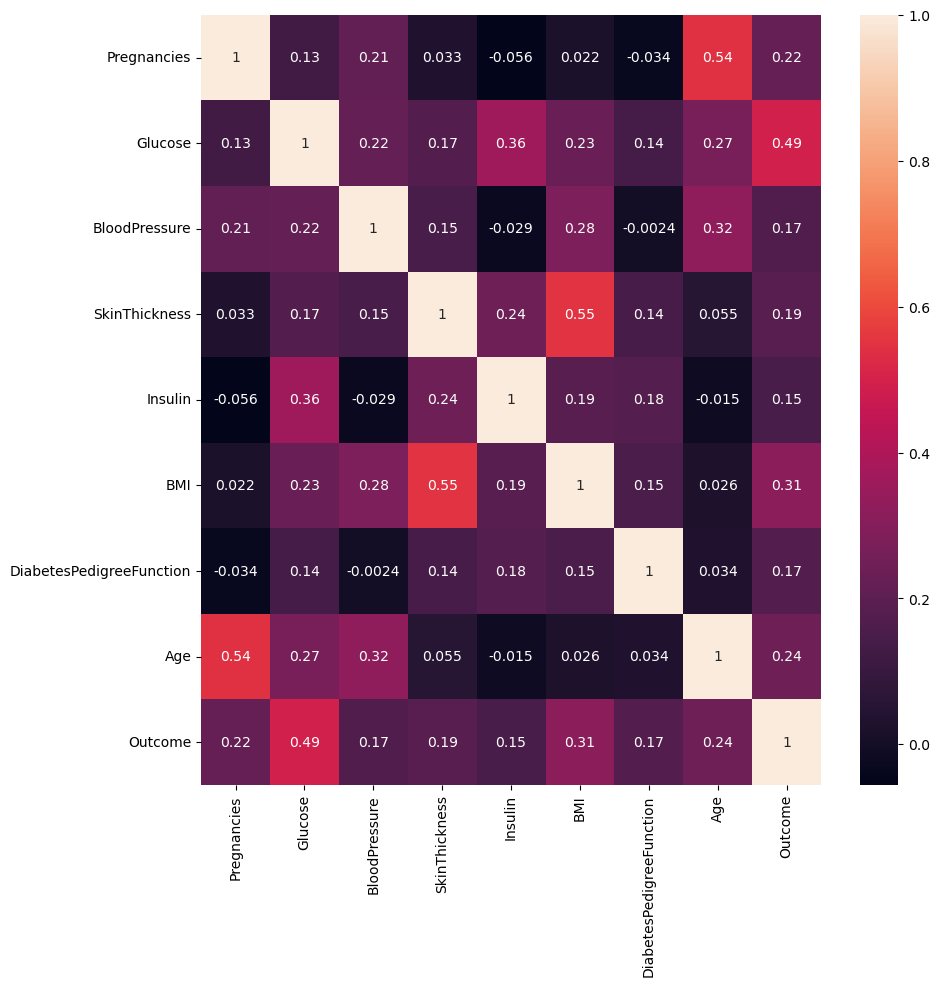

In [438]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

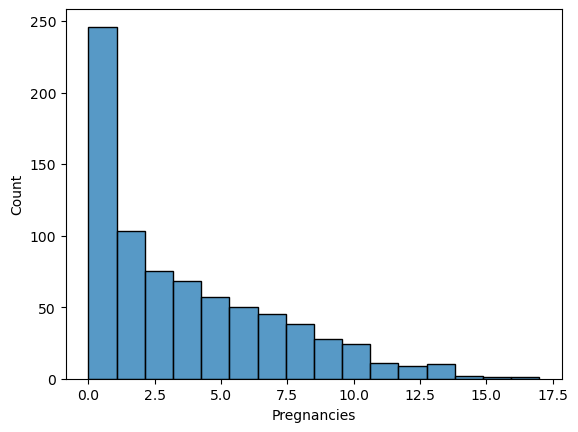

In [439]:
sns.histplot(data=df,x='Pregnancies')

In [440]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

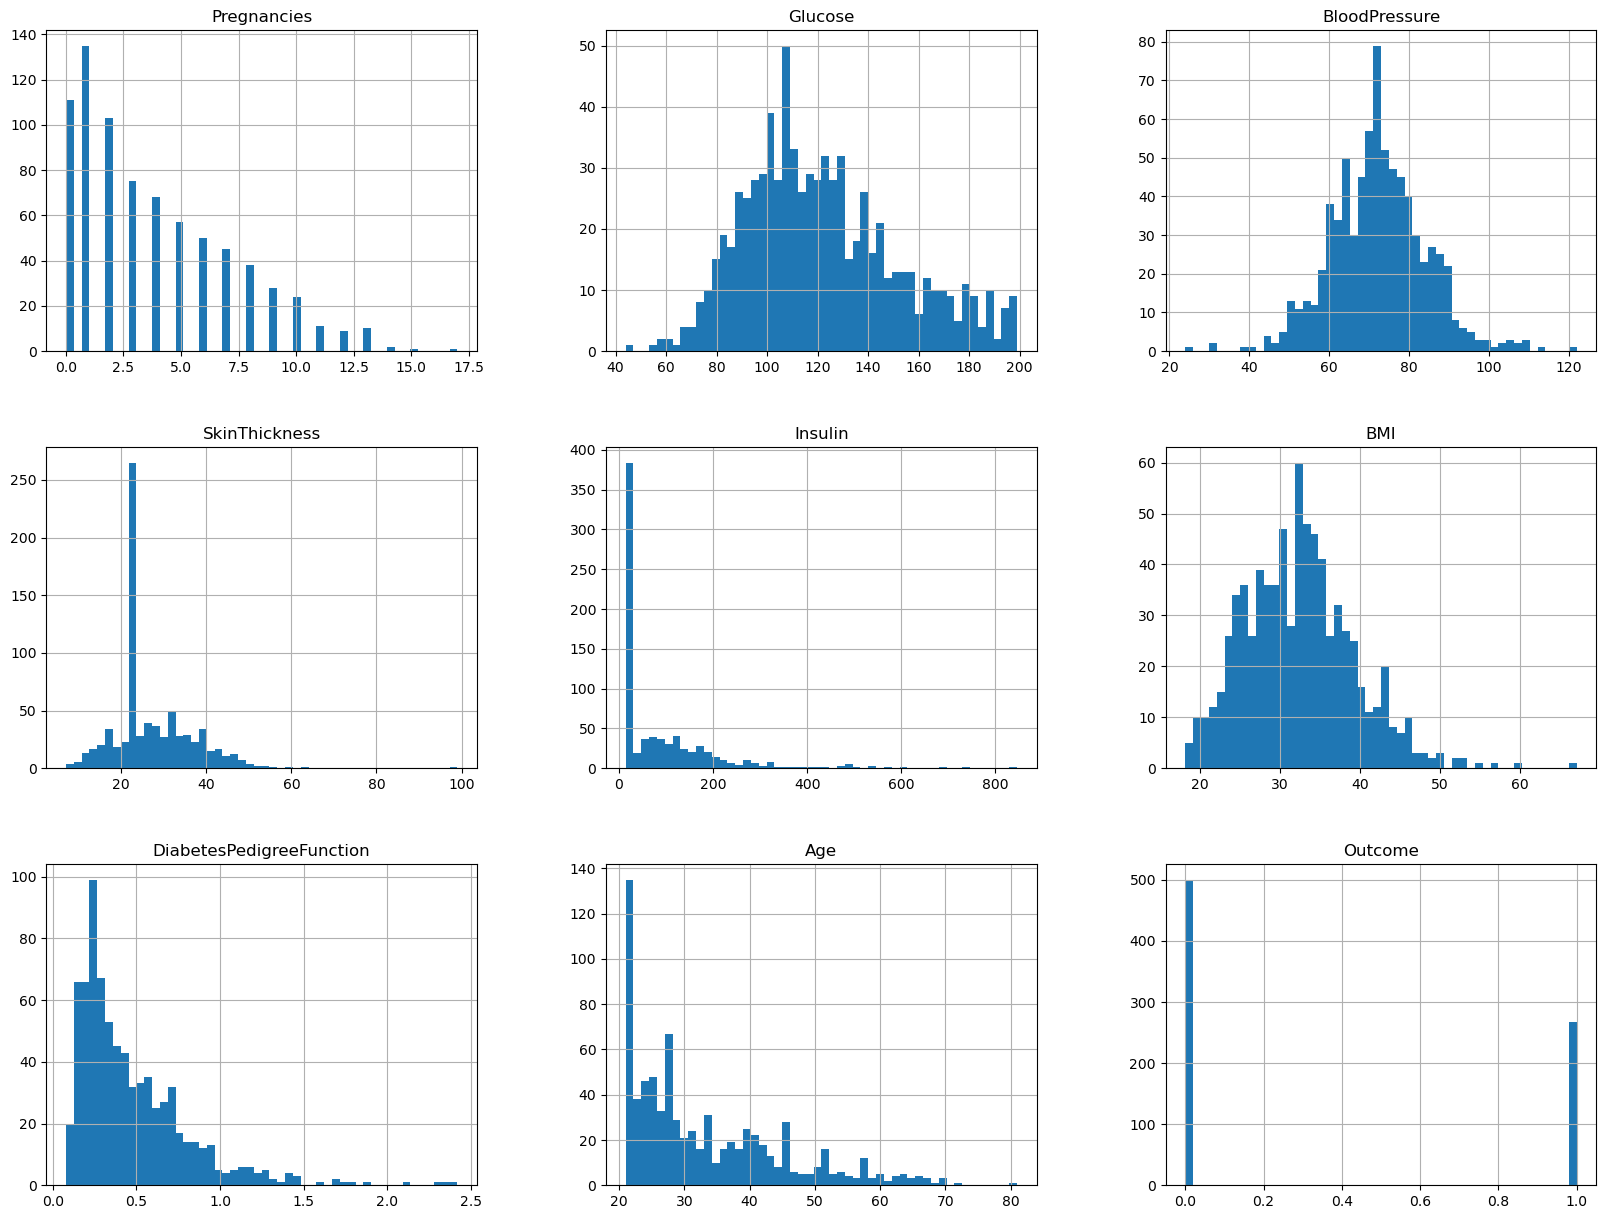

In [441]:
df.hist(bins=50,figsize=(20,15))

<AxesSubplot:xlabel='Age', ylabel='Count'>

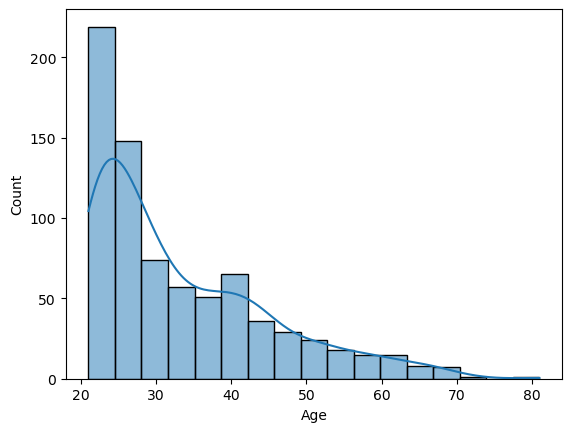

In [442]:
sns.histplot(data=df['Age'],kde=True)

In [443]:
#sns.pairplot(df)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


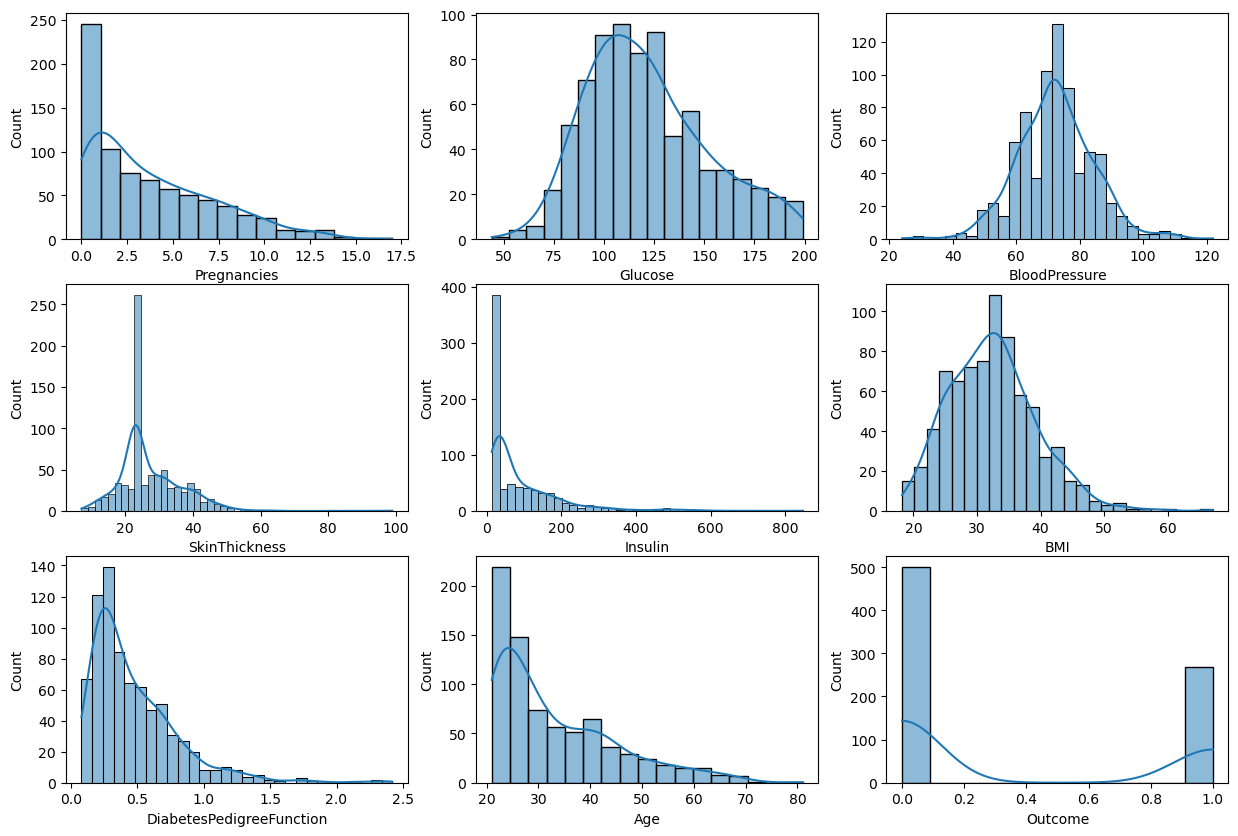

In [444]:
j=0
fig,axis=plt.subplots(4,8,figsize=(15,10))
for i in df.columns:
    j+=1
    print(i)    
    plt.subplot(3,3,j)
    sns.histplot(data=df[i],kde=True)

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical 
variables into dummy variables if necessary.

In [445]:
def outlierr(df):
    for i in df:
        print(i)
        minimum,Q1,median,Q3,maximum=np.quantile(df[i],[0,0.25,0.50,0.75,1.0])
        QTR=Q3-Q1
        low_outlier=Q1-1.5*QTR
        High_outlier=Q3+1.5*QTR
        print(low_outlier,High_outlier)
        print(df.shape)
        df=df[(df[i]<=High_outlier) & (df[i]>=low_outlier)]
    return df

In [446]:
df=outlierr(df)

Pregnancies
-6.5 13.5
(768, 9)
Glucose
37.5 201.5
(764, 9)
BloodPressure
40.0 104.0
(764, 9)
SkinThickness
9.5 45.5
(750, 9)
Insulin
-103.75 254.25
(717, 9)
BMI
14.500000000000004 48.099999999999994
(665, 9)
DiabetesPedigreeFunction
-0.3078750000000001 1.151125
(658, 9)
Age
0.0 64.0
(630, 9)
Outcome
-1.5 2.5
(615, 9)


In [447]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,23,30.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,23,30.5,22.5,0.142,33,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


<AxesSubplot:>

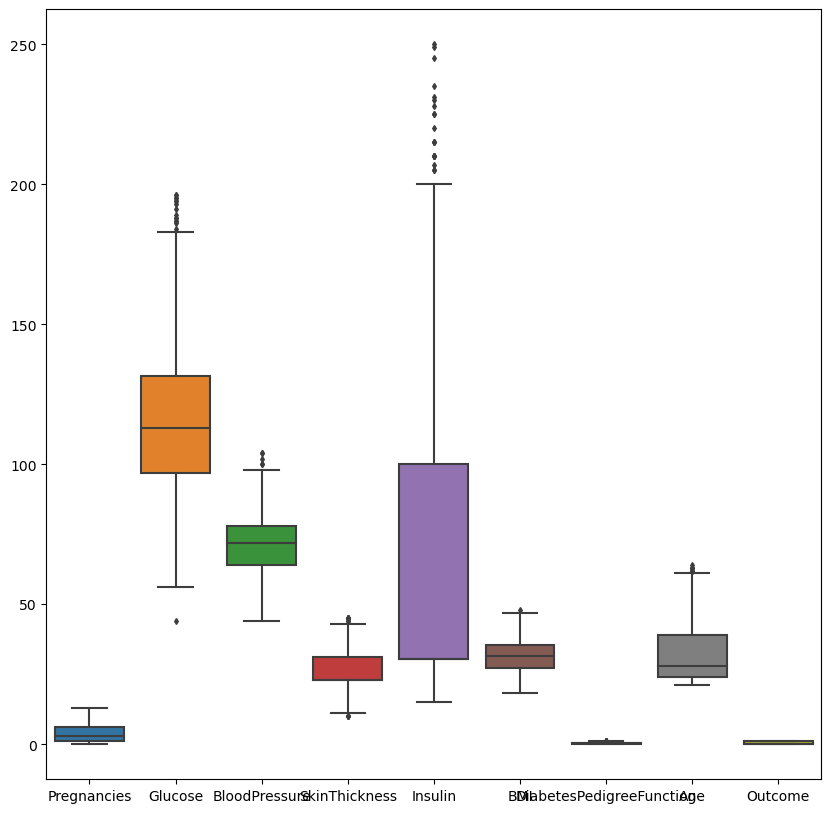

In [448]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,fliersize=3)

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [449]:
x=df.drop(columns=['Outcome'])

In [450]:
y=df['Outcome']

In [451]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=3)
x_train.shape, x_test.shape

((461, 8), (154, 8))

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use 
cross-validation to optimize the hyperparameters and avoid overfitting.

In [452]:
from sklearn.tree import DecisionTreeClassifier

In [453]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [454]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.542906746031746, 0.9761904761904762, 'X[1] <= 142.5\nentropy = 0.893\nsamples = 461\nvalue = [318, 143]'),
 Text(0.1949404761904762, 0.9285714285714286, 'X[5] <= 26.35\nentropy = 0.766\nsamples = 385\nvalue = [299, 86]'),
 Text(0.047619047619047616, 0.8809523809523809, 'X[7] <= 59.0\nentropy = 0.147\nsamples = 95\nvalue = [93, 2]'),
 Text(0.031746031746031744, 0.8333333333333334, 'X[6] <= 0.675\nentropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(0.015873015873015872, 0.7857142857142857, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(0.047619047619047616, 0.7857142857142857, 'X[3] <= 13.5\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(0.031746031746031744, 0.7380952380952381, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06349206349206349, 0.7380952380952381, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.06349206349206349, 0.8333333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.34226190476190477, 0.8809523809523809, '

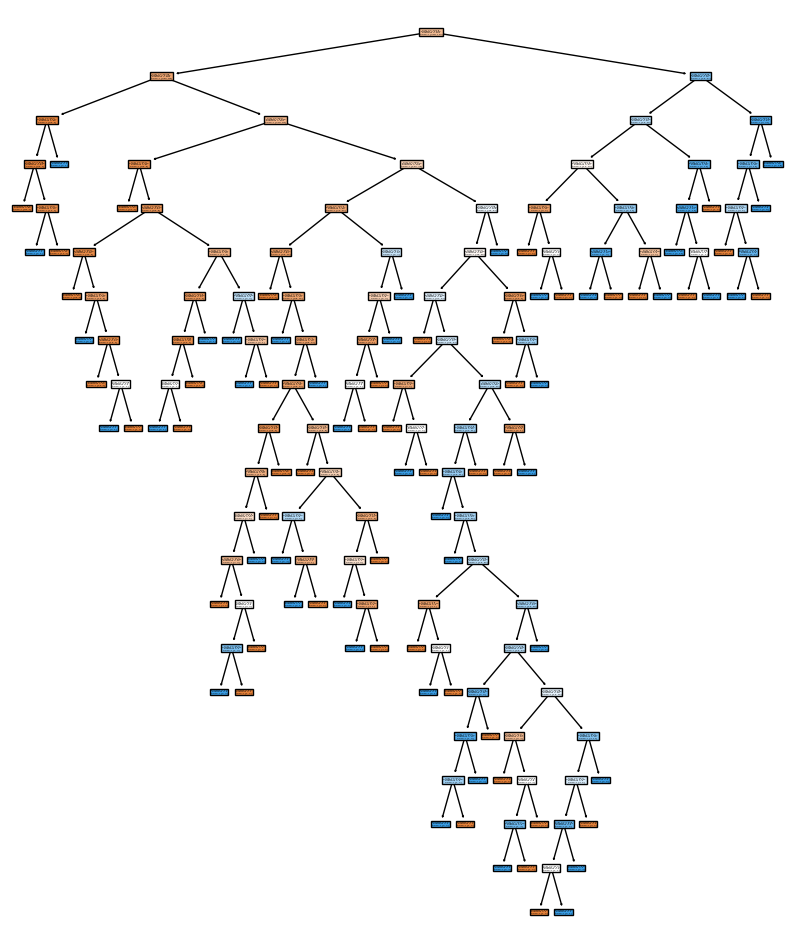

In [455]:
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(classifier,filled=True)

In [456]:
y_pred=classifier.predict(x_test)

In [457]:
from sklearn.metrics import accuracy_score,classification_report

In [458]:
score=accuracy_score(y_test,y_pred)
score

0.7207792207792207

In [459]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       107
           1       0.54      0.62      0.57        47

    accuracy                           0.72       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.72      0.73       154



## DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

In [460]:
import warnings
warnings.filterwarnings('ignore')

In [461]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[4,5,6,7,8,9,10],
    'max_features':['auto', 'sqrt', 'log2']
    }

In [462]:
from sklearn.model_selection import GridSearchCV

In [463]:
classifierCV=DecisionTreeClassifier()
clf=GridSearchCV(classifierCV,param_grid=parameter,cv=5,scoring='accuracy')

In [464]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [465]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'random'}

In [466]:
clf.best_score_

0.7506311360448809

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, 
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [467]:
y_pred1=clf.predict(x_test)

In [468]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred1,y_test)
print(score)
print(classification_report(y_pred1,y_test))

0.7662337662337663
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       127
           1       0.40      0.70      0.51        27

    accuracy                           0.77       154
   macro avg       0.66      0.74      0.68       154
weighted avg       0.83      0.77      0.79       154



In [470]:
classifier1=DecisionTreeClassifier(criterion='gini',max_depth=6,max_features= 'auto',splitter= 'random')

In [471]:
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='auto', splitter='random')

In [472]:
y_pred2=classifier1.predict(x_test)

In [473]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred2,y_test)
print(score)
print(classification_report(y_pred2,y_test))

0.7272727272727273
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       131
           1       0.30      0.61      0.40        23

    accuracy                           0.73       154
   macro avg       0.61      0.68      0.61       154
weighted avg       0.82      0.73      0.76       154



[Text(0.4817073170731707, 0.9285714285714286, 'X[2] <= 100.676\ngini = 0.428\nsamples = 461\nvalue = [318, 143]'),
 Text(0.4573170731707317, 0.7857142857142857, 'X[7] <= 26.499\ngini = 0.426\nsamples = 459\nvalue = [318, 141]'),
 Text(0.17073170731707318, 0.6428571428571429, 'X[6] <= 0.101\ngini = 0.252\nsamples = 189\nvalue = [161, 28]'),
 Text(0.14634146341463414, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.1951219512195122, 0.5, 'X[1] <= 109.653\ngini = 0.257\nsamples = 185\nvalue = [157, 28]'),
 Text(0.0975609756097561, 0.35714285714285715, 'X[0] <= 1.475\ngini = 0.122\nsamples = 107\nvalue = [100, 7]'),
 Text(0.04878048780487805, 0.21428571428571427, 'X[3] <= 23.454\ngini = 0.068\nsamples = 57\nvalue = [55, 2]'),
 Text(0.024390243902439025, 0.07142857142857142, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.07317073170731707, 0.07142857142857142, 'gini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.14634146341463414, 0.21428571428571427, 'X[4] <= 71.385\ngin

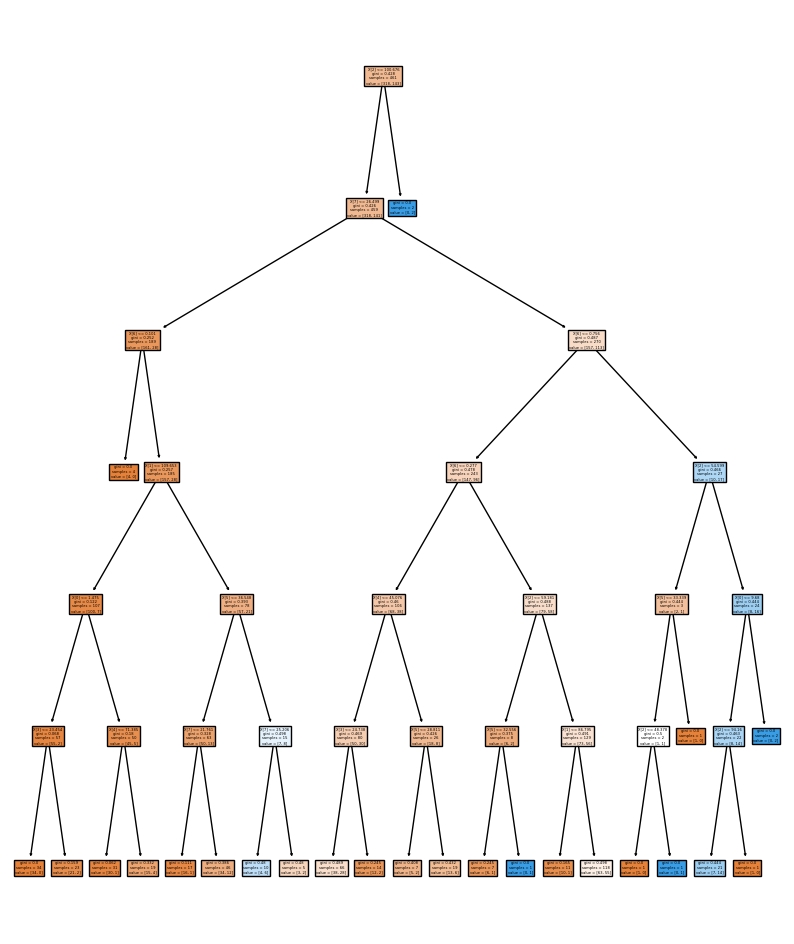

In [474]:
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(classifier1,filled=True)

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important 
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and 
trends.

#### 1st right split with Blood pressure>100.676 is leaf node, that means BP>100.676 are diabets and 4 people are there in this category.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the 
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and 
risks.

In [481]:
classifier1.predict([[6,148,72,35,0,33.6,0.627,50]])

array([0], dtype=int64)

In [477]:
classifier1.predict([[1,85,66,29,0,26.6,0.351,31]])

array([0], dtype=int64)